In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind

In [2]:
def Pareto(x, u, beta):
    y = beta*np.log(u)-beta*np.log(x)
    return y

In [3]:
def Potencia(x, x0, beta):
    y = beta*np.log(x)-beta*np.log(x0)
    return y

In [4]:
def Boltzmann(x, x0):
    y = np.log(x)-np.log(x0)
    return y

In [5]:
df = pd.read_csv('datos2.csv')
personas = pd.read_csv('poblacion.csv')

In [6]:
paises = ['Guatemala','Mexico','El Salvador', 'Honduras','United States']

In [7]:
df = df[df['Country Name'].isin(paises)]
personas = personas[personas['Country Name'].isin(paises)]

In [8]:
df = df.melt(id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'],var_name = 'anio', value_name = 'value_tot')
personas = personas.melt(id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'],var_name = 'anio', value_name = 'cantidad')

In [9]:
df = df[df['anio']!= 'Unnamed: 66']

In [10]:
df = df[['Country Name','anio','value_tot']]
personas = personas[['Country Name','anio','cantidad']]

In [11]:
df['anio']=df.anio.apply(int)
personas['anio']=personas.anio.apply(int)

In [12]:
df=df[df['anio']>= 2000]
personas=personas[personas['anio']>= 2000]

In [13]:
df.head()

,Country Name,anio,value_tot
200,Guatemala,2000,5.514696e+10
201,Honduras,2000,1.701738e+10
202,Mexico,2000,1.096749e+12
203,El Salvador,2000,2.627089e+10
204,United States,2000,1.025095e+13


In [14]:
personas.head()

,Country Name,anio,cantidad
200,Guatemala,2000,11589761.0
201,Honduras,2000,6574510.0
202,Mexico,2000,98899845.0
203,El Salvador,2000,5887930.0
204,United States,2000,282162411.0


In [15]:
df = df.merge(right = personas, how='left')

In [16]:
df.head()

,Country Name,anio,value_tot,cantidad
0,Guatemala,2000,5.514696e+10,11589761.0
1,Honduras,2000,1.701738e+10,6574510.0
2,Mexico,2000,1.096749e+12,98899845.0
3,El Salvador,2000,2.627089e+10,5887930.0
4,United States,2000,1.025095e+13,282162411.0


In [17]:
df['value'] = df['value_tot']/df['cantidad']

In [18]:
df.head()

,Country Name,anio,value_tot,cantidad,value
0,Guatemala,2000,5.514696e+10,11589761.0,4758.248081
1,Honduras,2000,1.701738e+10,6574510.0,2588.387620
2,Mexico,2000,1.096749e+12,98899845.0,11089.489995
3,El Salvador,2000,2.627089e+10,5887930.0,4461.821062
4,United States,2000,1.025095e+13,282162411.0,36329.956073


In [19]:
datos = []
contador = 2000

In [20]:
for i in range(2000,2022):
    muestra = df[df['anio']==i]
    GDP = muestra.value
    GDP = GDP.to_numpy()
    datos.append(GDP)

In [21]:
CCDF = np.array([0.99, 0.75, 0.5 , 0.25, 0.01])

In [22]:
beta_pareto = []
beta_potencia = []

u_pareto =[]
x0_potencia = []
x0_boltzmann = []

r2_pareto = []
r2_potencia = []
r2_boltzmann = []

In [23]:
for i in range(len(datos)):
    par_pareto, _ = curve_fit(Pareto, np.sort(datos[i]), np.log(CCDF), maxfev=5000)
    
    residuals_pareto = np.log(CCDF) - Pareto(np.sort(datos[i]), *par_pareto)
    ss_res_pareto = np.sum(residuals_pareto**2)
    ss_tot_pareto = np.sum((np.log(CCDF)-np.mean(np.log(CCDF)))**2)
    r_squared_pareto = 1 - (ss_res_pareto / ss_tot_pareto)
    
    u_pareto.append(par_pareto[0])
    beta_pareto.append(par_pareto[1])
    r2_pareto.append(r_squared_pareto)
    
    #para PPA p0=[0.001, 0.0012]
    par_potencia, _ = curve_fit(Potencia, np.sort(datos[i]), np.log(-np.log(CCDF)), p0=[2000, 0.6], maxfev=5000)
    
    residuals_potencia = np.log(-np.log(CCDF)) - Potencia(np.sort(datos[i]), *par_potencia)
    ss_res_potencia = np.sum(residuals_potencia**2)
    ss_tot_potencia = np.sum((np.log(-np.log(CCDF))-np.mean(np.log(-np.log(CCDF))))**2)
    r_squared_potencia = 1 - (ss_res_potencia / ss_tot_potencia)
    
    x0_potencia.append(par_potencia[0])
    beta_potencia.append(par_potencia[1])
    r2_potencia.append(r_squared_potencia)
    
    par_boltzmann, _ = curve_fit(Boltzmann, np.sort(datos[i]), np.log(-np.log(CCDF)), maxfev=5000)
    
    residuals_boltzmann = np.log(-np.log(CCDF)) - Boltzmann(np.sort(datos[i]), *par_boltzmann)
    ss_res_boltzmann = np.sum(residuals_boltzmann**2)
    ss_tot_boltzmann = np.sum((np.log(-np.log(CCDF))-np.mean(np.log(-np.log(CCDF))))**2)
    r_squared_boltzmann = 1 - (ss_res_boltzmann / ss_tot_boltzmann)
    
    x0_boltzmann.append(par_boltzmann[0])
    r2_boltzmann.append(r_squared_boltzmann)

In [24]:
r2_boltzmann

[0.564018807493647,
 0.5625206657151451,
 0.560926672868752,
 0.5584818553092588,
 0.5543555494020007,
 0.549837696882339,
 0.5486425774609353,
 0.5443999758964229,
 0.5419815669673252,
 0.5468891491604757,
 0.5479430263006073,
 0.550716226193507,
 0.5533312963759188,
 0.5532830195270264,
 0.544719743405822,
 0.5329873831549132,
 0.5228017177739834,
 0.5098814397469523,
 0.5078401490111117,
 0.5062918567240517,
 0.5207646956570251,
 0.5067862051240366]

In [25]:
an = [2000,2005,2010,2015,2020]
an_completo = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

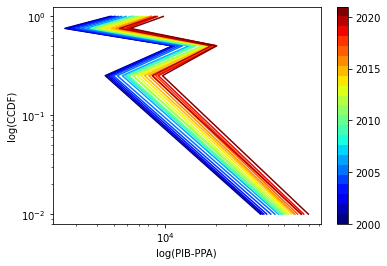

In [26]:
import matplotlib as mpl
# colormap
cmap = plt.get_cmap('jet', len(datos))
  
fig, ax1 = plt.subplots(1, 1)
  
for i in range(len(datos)):
    ax1.plot(datos[i], CCDF, c=cmap(i))
  
plt.xlabel('log(PIB-PPA)')
plt.ylabel('log(CCDF)')
plt.xscale("log")
plt.yscale("log")
  
# Normalizer
norm = mpl.colors.Normalize(vmin=2000, vmax=2021)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
  
plt.colorbar(sm, ticks=an)
  
plt.savefig('Pareto-log-log-PPA')  
plt.show()

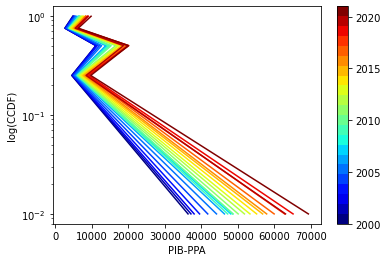

In [27]:
import matplotlib as mpl
# colormap
cmap = plt.get_cmap('jet', len(datos))
  
fig, ax1 = plt.subplots(1, 1)
  
for i in range(len(datos)):
    ax1.plot(datos[i], CCDF, c=cmap(i))
  
plt.xlabel('PIB-PPA')
plt.ylabel('log(CCDF)')
plt.yscale("log")
  
# Normalizer
norm = mpl.colors.Normalize(vmin=2000, vmax=2021)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
  
plt.colorbar(sm, ticks=an)
  
plt.savefig('Pareto-semi-log-PPA')  
plt.show()

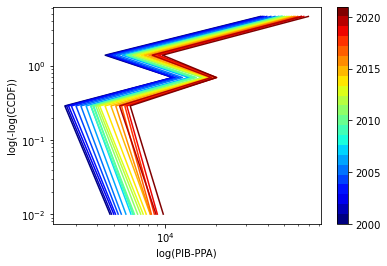

In [28]:
import matplotlib as mpl
# colormap
cmap = plt.get_cmap('jet', len(datos))
  
fig, ax1 = plt.subplots(1, 1)
  
for i in range(len(datos)):
    ax1.plot(datos[i], -np.log(CCDF), c=cmap(i))
  
plt.xlabel('log(PIB-PPA)')
plt.ylabel('log(-log(CCDF))')
plt.xscale("log")
plt.yscale("log")
  
# Normalizer
norm = mpl.colors.Normalize(vmin=2000, vmax=2021)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
  
plt.colorbar(sm, ticks=an)
  
plt.savefig('Exp-log-log-PPA')
plt.show()

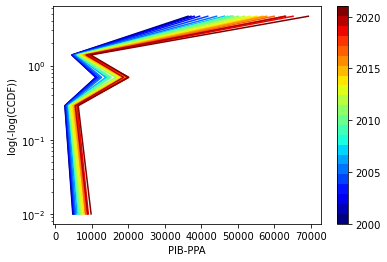

In [29]:
import matplotlib as mpl
# colormap
cmap = plt.get_cmap('jet', len(datos))
  
fig, ax1 = plt.subplots(1, 1)
  
for i in range(len(datos)):
    ax1.plot(datos[i], -np.log(CCDF), c=cmap(i))
  
plt.xlabel('PIB-PPA')
plt.ylabel('log(-log(CCDF))')
plt.yscale("log")
  
# Normalizer
norm = mpl.colors.Normalize(vmin=2000, vmax=2021)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
  
plt.colorbar(sm, ticks=an)
  
plt.savefig('Exp-semi-log-PPA')
plt.show()

In [30]:
from scipy.optimize import curve_fit
import numpy as np
import scipy.odr
import scipy.stats

p_u_par = []
p_beta_par = []

for i in range(len(datos)):
    
    x = np.sort(datos[i])
    y = CCDF

    def Pareto(x, u, beta):
        y = beta*np.log(u)-beta*np.log(x)
        return y


    def Pareto_wrapper_for_odr(lis_par, x): # parameter order for odr
        return Pareto(x, *lis_par)

    parameters, cov= curve_fit(Pareto, x, np.log(y))

    model = scipy.odr.odrpack.Model(Pareto_wrapper_for_odr)
    data = scipy.odr.odrpack.Data(x,np.log(y))
    myodr = scipy.odr.odrpack.ODR(data, model, beta0=parameters,  maxit=0)
    myodr.set_job(fit_type=2)
    parameterStatistics = myodr.run()
    df_e = len(x) - len(parameters) # degrees of freedom, error
    cov_beta = parameterStatistics.cov_beta # parameter covariance matrix from ODR
    sd_beta = parameterStatistics.sd_beta * parameterStatistics.sd_beta
    ci = []
    t_df = scipy.stats.t.ppf(0.90, df_e)
    ci = []
    for j in range(len(parameters)):
        ci.append([parameters[j] - t_df * parameterStatistics.sd_beta[j], parameters[j] + t_df * parameterStatistics.sd_beta[j]])

    tstat_beta = parameters / parameterStatistics.sd_beta # coeff t-statistics
    pstat_beta = (1.0 - scipy.stats.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values

    for k in range(len(parameters)):
        #print('parameter:', parameters[i])
        #print('   conf interval:', ci[i][0], ci[i][1])
        #print('   tstat:', tstat_beta[i])
        if k == 0:
            p_u_par.append(pstat_beta[k])
        else:
            p_beta_par.append(pstat_beta[k])
        

In [31]:
from scipy.optimize import curve_fit
import numpy as np
import scipy.odr
import scipy.stats

p_x0_exp = []
p_beta_exp = []

for i in range(len(datos)):
    
    x = np.sort(datos[i])
    y = CCDF

    def Potencia(x, x0, beta):
        y = beta*np.log(x)-beta*np.log(x0)
        return y


    def Potencia_wrapper_for_odr(lis_par, x): # parameter order for odr
        return Potencia(x, *lis_par)

    parameters, cov= curve_fit(Potencia, x, np.log(-np.log(y)), p0=[2000, 0.6], maxfev=5000)

    model = scipy.odr.odrpack.Model(Potencia_wrapper_for_odr)
    data = scipy.odr.odrpack.Data(x,np.log(-np.log(y)))
    myodr = scipy.odr.odrpack.ODR(data, model, beta0=parameters,  maxit=0)
    myodr.set_job(fit_type=2)
    parameterStatistics = myodr.run()
    df_e = len(x) - len(parameters) # degrees of freedom, error
    cov_beta = parameterStatistics.cov_beta # parameter covariance matrix from ODR
    sd_beta = parameterStatistics.sd_beta * parameterStatistics.sd_beta
    ci = []
    t_df = scipy.stats.t.ppf(0.90, df_e)
    ci = []
    for j in range(len(parameters)):
        ci.append([parameters[j] - t_df * parameterStatistics.sd_beta[j], parameters[j] + t_df * parameterStatistics.sd_beta[j]])

    tstat_beta = parameters / parameterStatistics.sd_beta # coeff t-statistics
    pstat_beta = (1.0 - scipy.stats.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values

    for k in range(len(parameters)):
        #print('parameter:', parameters[i])
        #print('   conf interval:', ci[i][0], ci[i][1])
        #print('   tstat:', tstat_beta[i])
        if k == 0:
            p_x0_exp.append(pstat_beta[k])
        else:
            p_beta_exp.append(pstat_beta[k])

In [32]:
from scipy.optimize import curve_fit
import numpy as np
import scipy.odr
import scipy.stats

p_x0_boltz = []

for i in range(len(datos)):
    
    x = np.sort(datos[i])
    y = CCDF

    def Boltzmann(x, x0):
        y = np.log(x)-np.log(x0)
        return y


    def Boltzmann_wrapper_for_odr(lis_par, x): # parameter order for odr
        return Boltzmann(x, *lis_par)

    parameters, cov= curve_fit(Boltzmann, x, np.log(-np.log(y)))

    model = scipy.odr.odrpack.Model(Boltzmann_wrapper_for_odr)
    data = scipy.odr.odrpack.Data(x,np.log(-np.log(y)))
    myodr = scipy.odr.odrpack.ODR(data, model, beta0=parameters,  maxit=0)
    myodr.set_job(fit_type=2)
    parameterStatistics = myodr.run()
    df_e = len(x) - len(parameters) # degrees of freedom, error
    cov_beta = parameterStatistics.cov_beta # parameter covariance matrix from ODR
    sd_beta = parameterStatistics.sd_beta * parameterStatistics.sd_beta
    ci = []
    t_df = scipy.stats.t.ppf(0.90, df_e)
    ci = []
    for j in range(len(parameters)):
        ci.append([parameters[j] - t_df * parameterStatistics.sd_beta[j], parameters[j] + t_df * parameterStatistics.sd_beta[j]])

    tstat_beta = parameters / parameterStatistics.sd_beta # coeff t-statistics
    pstat_beta = (1.0 - scipy.stats.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values

    for k in range(len(parameters)):
        #print('parameter:', parameters[i])
        #print('   conf interval:', ci[i][0], ci[i][1])
        #print('   tstat:', tstat_beta[i])
        if k == 0:
            p_x0_boltz.append(pstat_beta[k])

In [35]:
beta_potencia

[1.9258416624276495,
 1.9279253034952375,
 1.9338680653450895,
 1.9232799391761455,
 1.90484825454109,
 1.897351824201696,
 1.910905843405884,
 1.9301795126962613,
 1.9506434964582722,
 1.9656968709953053,
 1.9588768394229465,
 1.9723635517873113,
 1.966519212383445,
 1.9796233086172583,
 1.992547184849975,
 2.019745825949246,
 2.0238177521381693,
 2.0201196352742077,
 2.016213287101447,
 2.0206785825224034,
 2.0069980072033227,
 2.0265590259495454]

In [38]:
np.mean(r2_boltzmann)

0.5404273307341481